237


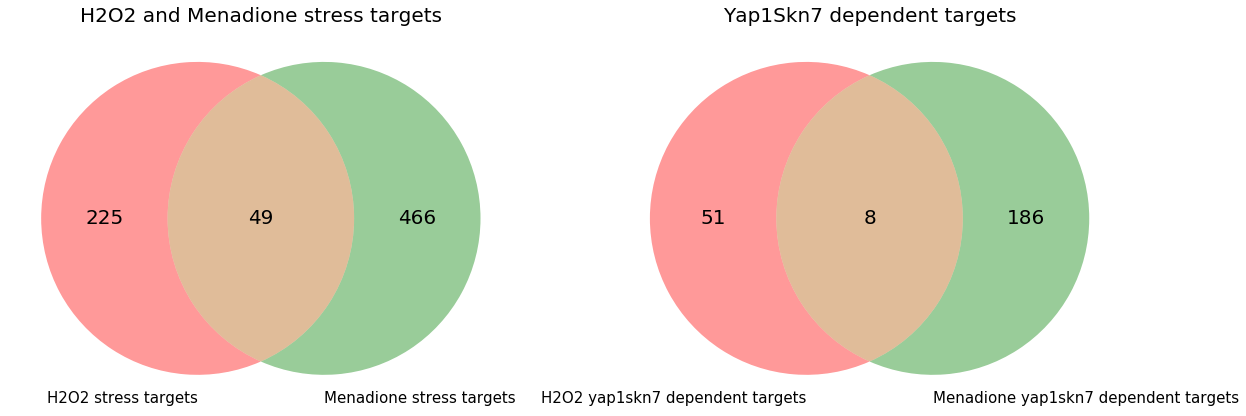

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2_unweighted

fig, axes = plt.subplots(1, 2, figsize=(20, 10))
axes[0].set_title('H2O2 and Menadione stress targets', fontsize=(20))
axes[1].set_title('Yap1Skn7 dependent targets', fontsize=(20))

df = pd.read_csv(
    '../data/normalized_data_oxidative_stress_Candida_glabrata.txt.csv')

cols_wanted = []
h2o2_stress_unstress = 'E01-07-WT.gpr;E01-09-WT.gpr'
cols_wanted.append(h2o2_stress_unstress)

h2o2_yap1skn7_stress = 'E01-08-dd.gpr;E01-10-dd.gpr'
cols_wanted.append(h2o2_yap1skn7_stress)

mena_stress_unstress = 'mena_wt.gpr;mena_wt22.gpr'
cols_wanted.append(mena_stress_unstress)

mena_yap1skn7_stress = 'mena_sy.gpr;mena_sy22.gpr'
cols_wanted.append(mena_yap1skn7_stress)

df = df.drop(0)
df.index = df['Scan REF']

df = df.loc[:, cols_wanted]

df.columns = ['h2o2_stress_unstress', 'h2o2_yap1skn7_stress',
              'mena_stress_unstress', 'mena_yap1skn7_stress']

df = df.astype(float)

h2o2_targets = df[df.iloc[:, 0] > 1]
h2o2_targets = list(h2o2_targets.index)

mena_targets = df[df.iloc[:, 2] > 1]
mena_targets = list(mena_targets.index)

h2o2_mena_overlap_targets = list(set(h2o2_targets) & set(mena_targets))

venn1 = venn2_unweighted(subsets=(len(h2o2_targets), len(mena_targets),
                         len(h2o2_mena_overlap_targets)), ax=axes[0],
                         set_labels=('H2O2 stress targets', 'Menadione stress targets'))

for text in venn1.set_labels:
    text.set_fontsize(15)

for text in venn1.subset_labels:
    text.set_fontsize(20)

h2o2_targets_df = df.loc[h2o2_targets, :]
h2o2_yap1skn7_dependent_targets = h2o2_targets_df[abs(h2o2_targets_df.iloc[:, 1]) < 0.3]
h2o2_yap1skn7_dependent_targets = list(h2o2_yap1skn7_dependent_targets.index)

mena_targets_df = df.loc[mena_targets, :]
mena_yap1skn7_dependent_targets = mena_targets_df[abs(mena_targets_df.iloc[:, 1]) < 0.3]
mena_yap1skn7_dependent_targets = list(mena_yap1skn7_dependent_targets.index)

h2o2_mena_yap1skn7_dependent_targets_overlap = list(
    set(h2o2_yap1skn7_dependent_targets)
    & set(mena_yap1skn7_dependent_targets))

venn2 = venn2_unweighted(subsets=(len(h2o2_yap1skn7_dependent_targets),
                         len(mena_yap1skn7_dependent_targets),
                         len(h2o2_mena_yap1skn7_dependent_targets_overlap)),
                         ax=axes[1],
                         set_labels=('H2O2 yap1skn7 dependent targets', 'Menadione yap1skn7 dependent targets'))

for text in venn2.set_labels:
    text.set_fontsize(15)

for text in venn2.subset_labels:
    text.set_fontsize(20)
    
print(len(h2o2_yap1skn7_dependent_targets) + len(mena_yap1skn7_dependent_targets))

In [4]:
table = pd.read_csv('../data/Table.txt', sep='\t', index_col=0)

chip_cols = table.iloc[:, 9:11]

potential_target_list = h2o2_yap1skn7_dependent_targets + mena_yap1skn7_dependent_targets + h2o2_mena_yap1skn7_dependent_targets_overlap
# print(chip_cols.loc[potential_target_list, :].iloc[:, 0])

<BarContainer object of 245 artists>

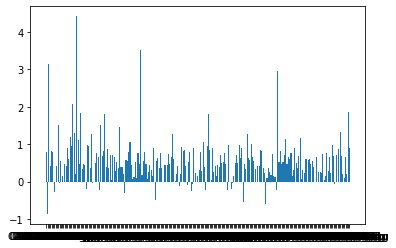

In [4]:
to_graph = chip_cols.loc[potential_target_list, :]

# Chip-seq rep 1 values for h2o2 and menadione targets
plt.bar(to_graph.index, to_graph.iloc[:, 0])

<BarContainer object of 245 artists>

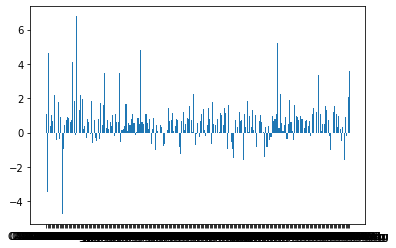

In [30]:
# Chip-seq rep 2 values for h2o2 and menadione targets
plt.bar(to_graph.index, to_graph.iloc[:, 1])

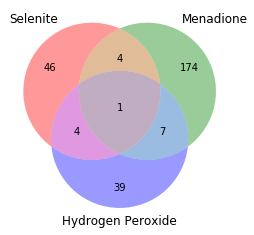

In [5]:
# Average values for selenite reps (this was done in roetzer paper) then use threshold for cutoff
df_table = pd.read_csv('../data/Table.txt', sep='\t')
selenite_df = df_table.iloc[:, 5:7]
selenite_df.index = df_table.iloc[:, 0]
selenite_averaged = selenite_df.mean(axis=1)

selenite_targets = selenite_averaged[selenite_averaged > 1]
selenite_target_list = list(selenite_targets.index)

from matplotlib_venn import venn3_unweighted

venn3_unweighted(subsets= [set(selenite_target_list), set(mena_yap1skn7_dependent_targets), set(h2o2_yap1skn7_dependent_targets)], set_labels=('Selenite', 'Menadione', 'Hydrogen Peroxide'))

mean 0.7766474137686397


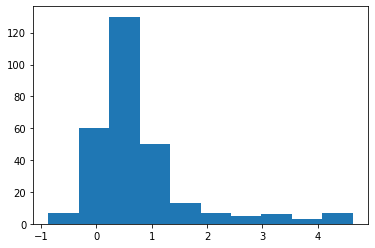

In [8]:
# Histogram of Chip-seq rep 1 values for h2o2, selenite, and menadione targets
total_targets = list(selenite_targets.index) + mena_yap1skn7_dependent_targets + h2o2_yap1skn7_dependent_targets

chip_rep_1_target_values = chip_cols.loc[total_targets, :].iloc[:, 0]

plt.hist(chip_rep_1_target_values.values)

import numpy as np
# Note ~ is bitwise NOT operator so A[~np.isnan(A)] gives all non NaN values in A
print('mean', np.mean(chip_rep_1_target_values[~np.isnan(chip_rep_1_target_values.values)]))

mean 0.9445876665042646


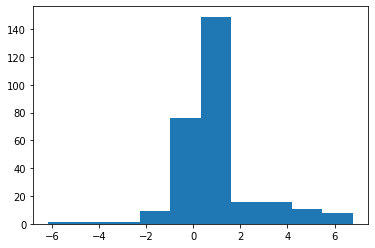

In [7]:
# Histogram of Chip-seq rep 2 values for h2o2, selenite, and menadione targets

chip_rep_2_target_values = chip_cols.loc[total_targets, :].iloc[:, 1]

plt.hist(chip_cols.loc[total_targets, :].iloc[:, 1].values)

print('mean', np.mean(chip_rep_2_target_values[~np.isnan(chip_rep_2_target_values.values)]))

h2o2 mean 0.006060796251572307
h2o2 whiskers [-1.530592243, 1.497334777]
h2o2 median [-0.015800376] 

menadione mean 0.21152800871667846
menadione whiskers [-1.525599048, 1.940867462]
menadione median [0.247326034] 

selenite mean 0.005278512562606556
selenite whiskers [-0.5068824832909951, 0.4784015319556775]
selenite median [-0.01991077219565851]


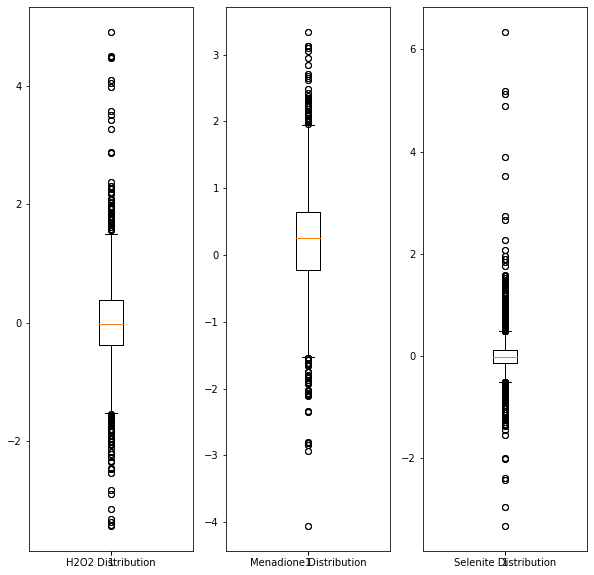

In [9]:
# Distribution of values for selenite, hydrogen peroxide, and menadione data across the genome

h2o2_data = df.iloc[:, 0]
h2o2_data = h2o2_data[~np.isnan(h2o2_data)]
mena_data = df.iloc[:, 2]
mena_data = mena_data[~np.isnan(mena_data)]
selenite_data = selenite_averaged[~np.isnan(selenite_averaged.values)]

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(10,10))
ax1.boxplot(h2o2_data)
ax1.set_xticklabels(['H2O2 Distribution'])
a = ax1.boxplot(h2o2_data)
ax2.boxplot(mena_data)
ax2.set_xticklabels(['Menadione Distribution'])
b = ax2.boxplot(mena_data)
ax3.boxplot(selenite_data)
ax3.set_xticklabels(['Selenite Distribution'])
c = ax3.boxplot(selenite_data)


keys = ['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means']

whiskers_h2o2 = [item.get_ydata()[1] for item in a[keys[0]]]
whiskers_mena = [item.get_ydata()[1] for item in b[keys[0]]]
whiskers_selenite = [item.get_ydata()[1] for item in c[keys[0]]]

median_h2o2 = [item.get_ydata()[0] for item in a[keys[3]]]
median_mena = [item.get_ydata()[0] for item in b[keys[3]]]
median_selenite = [item.get_ydata()[0] for item in c[keys[3]]]

print('h2o2 mean', np.mean(h2o2_data))
print('h2o2 whiskers', whiskers_h2o2)
print('h2o2 median', median_h2o2, '\n')
print('menadione mean', np.mean(mena_data))
print('menadione whiskers', whiskers_mena)
print('menadione median', median_mena, '\n')
print('selenite mean', np.mean(selenite_data))
print('selenite whiskers', whiskers_selenite)
print('selenite median', median_selenite)


Text(0.5, 1.0, 'Selenite Histogram')

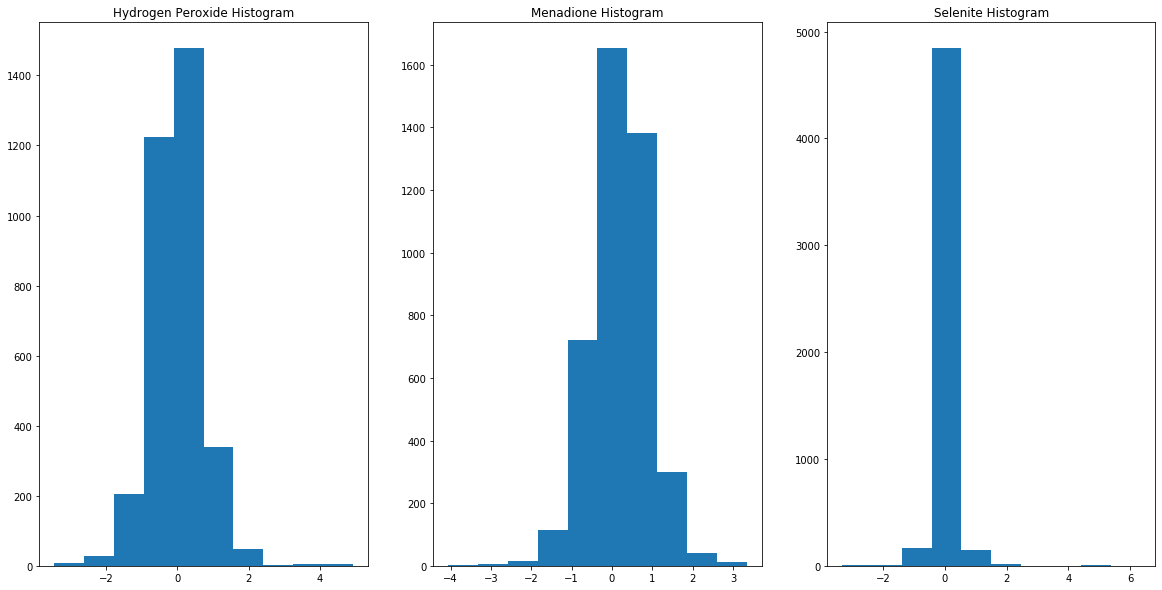

In [14]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))
ax1.hist(h2o2_data)
ax1.set_title('Hydrogen Peroxide Histogram')
ax2.hist(mena_data)
ax2.set_title('Menadione Histogram')
ax3.hist(selenite_data)
ax3.set_title('Selenite Histogram')